# **Project 25: Employee Promotion Predictor**

***Pandas*** : *Provides data structures and functions for manipulating and analyzing structured data in Python.*

***Numpy*** : *Offers support for numerical operations with arrays and matrices in Python.*

***Matplotlib*** : *A library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *Builds on matplotlib to create attractive and informative statistical graphics.*

***Warnings*** : *A module for issuing and controlling warning messages in Python.*

# **Data Loading**

**We import these libraries for Data Loading, Data Cleaning, Data Visualization and EDA (Explorotory Data Analysis).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Suppresses all warning messages generated during the script's execution.**

In [2]:
warnings.filterwarnings('ignore')

**Reads the 'employee_promotion.csv' file into a pandas DataFrame and sets pandas to display all columns when printing the DataFrame.**

In [3]:
df = pd.read_csv("/content/employee_promotion.csv")
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


**Removes the "employee_id" column from the DataFrame and updates it in place.**

In [4]:
df.drop(columns=["employee_id"], axis=1, inplace=True)
df.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


**Provides a summary of the DataFrame, including the index range, column names, non-null counts, and data types.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    52248 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.0+ MB


**Returns the dimensions of the DataFrame, showing the number of rows and columns.**

In [6]:
df.shape

(54808, 12)

**Counts and displays the number of missing (null) values in each column of the DataFrame.**

In [7]:
df.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0


**Fills missing values in the "education" column with the string "No Information" and then checks for any remaining missing values in the DataFrame.**

In [8]:
df["education"] = df["education"].fillna("No Information")
df.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0


**Imputes missing values in the "previous_year_rating" and "avg_training_score" columns with the mean of each respective column and then checks for any remaining missing values in the DataFrame.**

In [9]:
from sklearn.impute import SimpleImputer

Impute = SimpleImputer(strategy = "mean")

df["previous_year_rating"] = Impute.fit_transform(df[["previous_year_rating"]])

df["avg_training_score"] = Impute.fit_transform(df[["avg_training_score"]])

df.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
awards_won,0


# **Data Visualization**

**Creates and displays a pie chart showing the distribution of promotion status in the "is_promoted" column, with labels for "Not Promoted (0)" and "Promoted (1)" and percentage annotations.**

**This graph illustrates the distribution of the target variable "is_promoted." It shows that 8.5% of individuals are promoted, while 91.5% are not promoted.**

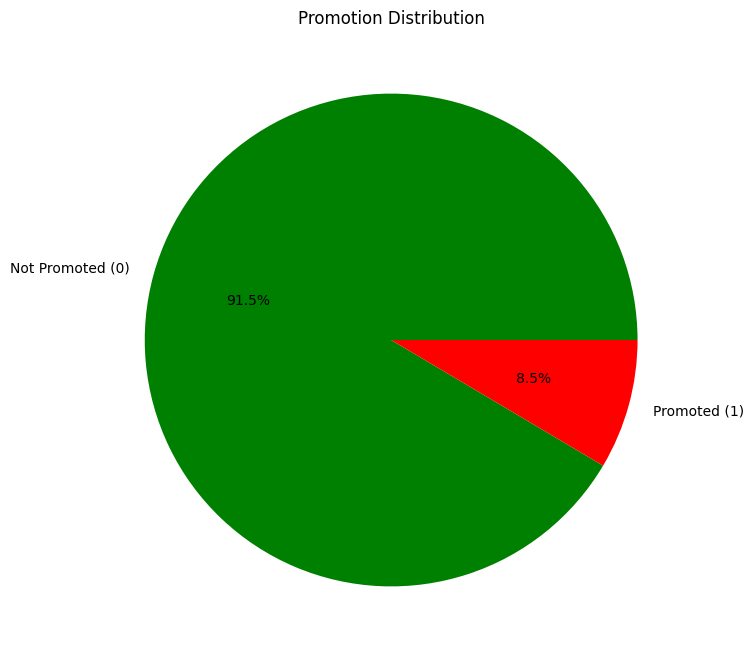

In [10]:
counts = pd.Series(df['is_promoted']).value_counts()

labels = ['Not Promoted (0)', 'Promoted (1)']
sizes = [counts[0], counts[1]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green','red'])
plt.title('Promotion Distribution')
plt.show()

**Defines a list of column names to be used for further analysis or operations in the DataFrame.**

In [11]:
cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']

**Plots a boxplot for each column in the cols list to visualize the distribution and identify potential outliers. (Note: The plt.figsize line should be corrected to plt.figure(figsize=(10, 5)) for proper functionality.)**

**In this graph, we create a box plot for each column to identify and address outliers.**

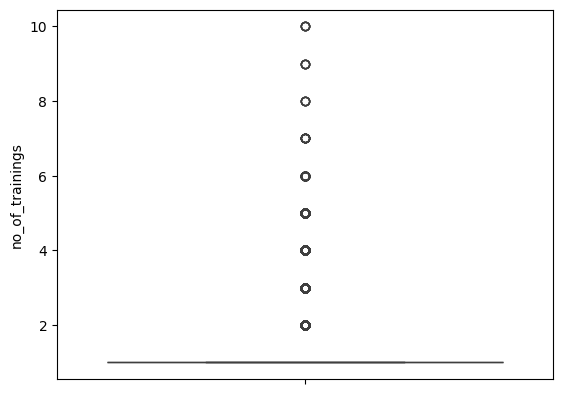

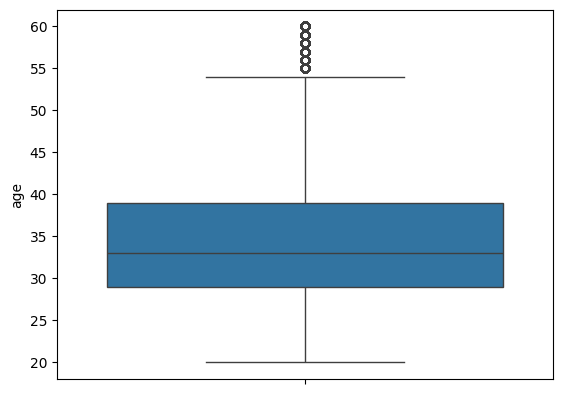

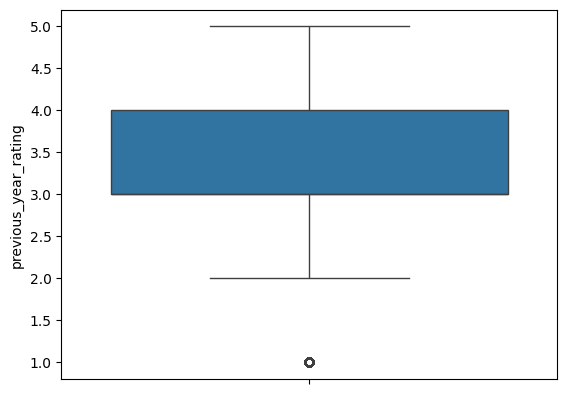

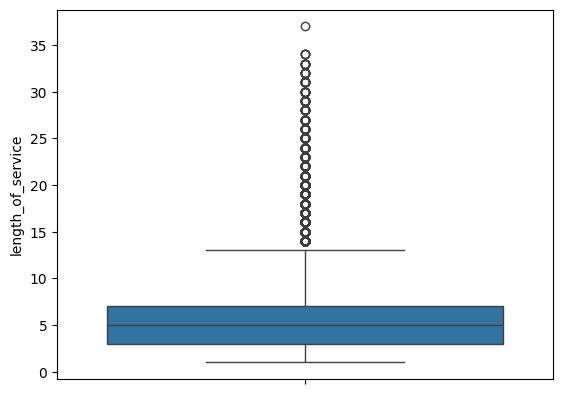

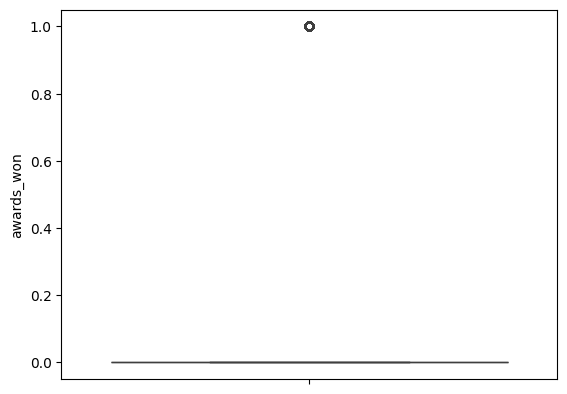

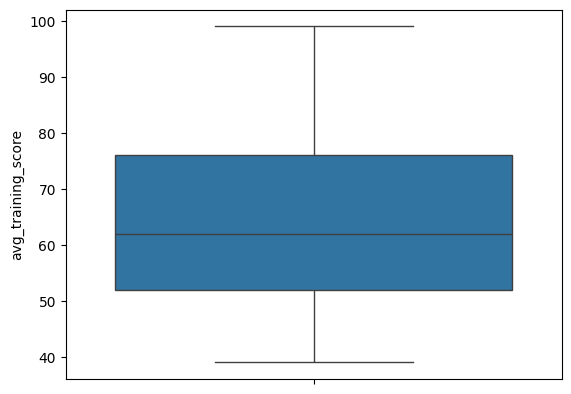

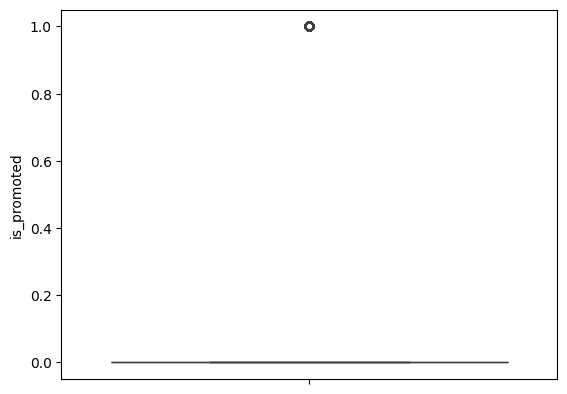

In [12]:
for i in cols:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

**Creates and displays a count plot showing the distribution of the "education" column, with bars colored by "is_promoted" to illustrate the promotion status across different education levels.**


**In this graph, we present a bar chart analyzing promotion rates based on the individual's education level. The data indicates that individuals with a bachelor's degree are less likely to be promoted, with only a 5% chance of promotion compared to those with other educational backgrounds.**

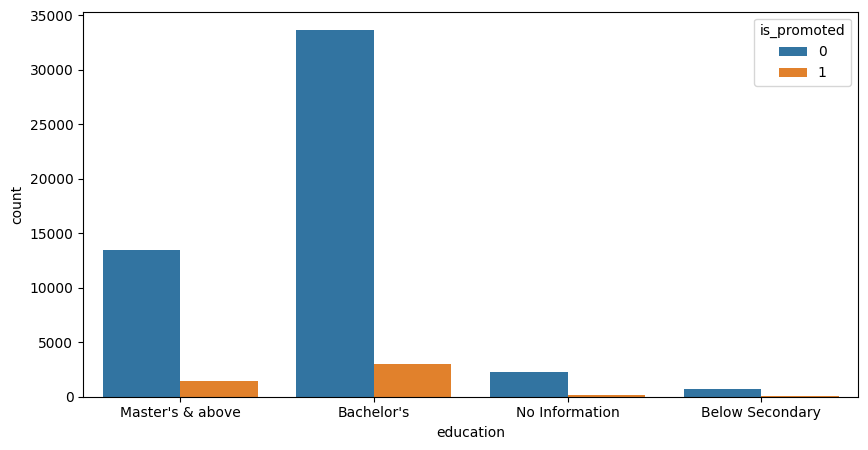

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='is_promoted', data=df)
plt.show()

**Creates and displays a count plot showing the distribution of the "gender" column, with bars colored by "is_promoted" to illustrate the promotion status across different genders.**

**This graph analyzes promotion rates based on gender (Male and Female). It shows that men have a higher likelihood of being promoted compared to women.**

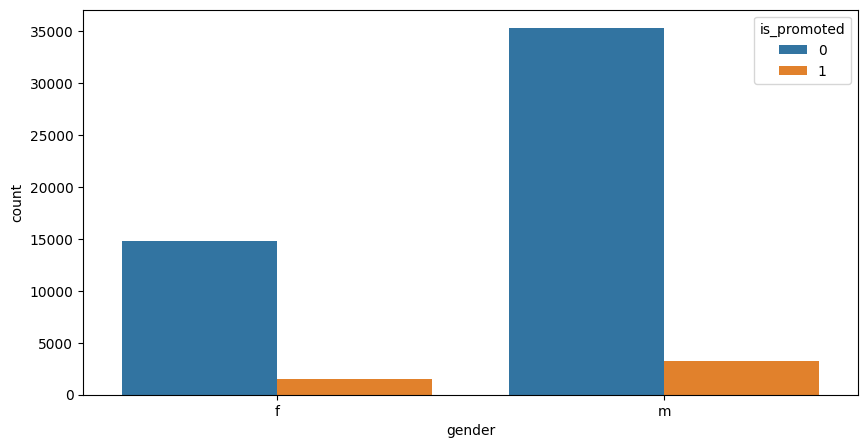

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', hue='is_promoted', data=df)
plt.show()

**Displays the first five rows of the DataFrame to provide a snapshot of the data.**

In [15]:
df.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


**Lists the unique values present in the "education" column of the DataFrame.**

In [16]:
df["education"].unique()

array(["Master's & above", "Bachelor's", 'No Information',
       'Below Secondary'], dtype=object)

# **Data Cleaning**

**Converts the "education" column into multiple binary columns using one-hot encoding and displays the first five rows of the updated DataFrame.**

In [17]:
df = pd.get_dummies(df, columns=["education"])
df.head(5)

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,education_No Information
0,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,False,False,True,False
1,Operations,region_22,m,other,1,30,5.0,4,0,60.0,0,True,False,False,False
2,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,True,False,False,False
3,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,50.0,0,True,False,False,False
4,Technology,region_26,m,other,1,45,3.0,2,0,73.0,0,True,False,False,False


**Renames the one-hot encoded columns of "education" to more readable names and displays the first five rows of the updated DataFrame.**

In [18]:
df.rename(columns={"education_Bachelor's": "Bachelor"}, inplace=True)
df.rename(columns={"education_Below Secondary": "Below_Secondary"}, inplace=True)
df.rename(columns={"education_Master's & above": "Master & Above"}, inplace=True)
df.rename(columns={"education_No Information": "No Information"}, inplace=True)

df.head(5)

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,Below_Secondary,Master & Above,No Information
0,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,False,False,True,False
1,Operations,region_22,m,other,1,30,5.0,4,0,60.0,0,True,False,False,False
2,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,True,False,False,False
3,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,50.0,0,True,False,False,False
4,Technology,region_26,m,other,1,45,3.0,2,0,73.0,0,True,False,False,False


**Converts the specified columns to integer type and displays the first five rows of the updated DataFrame.**

In [19]:
columns = ["Bachelor", "No Information", "Below_Secondary", "Master & Above"]

df[columns] = df[columns].astype(int)

df.head(5)

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,Below_Secondary,Master & Above,No Information
0,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,0,0,1,0
1,Operations,region_22,m,other,1,30,5.0,4,0,60.0,0,1,0,0,0
2,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,1,0,0,0
3,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,50.0,0,1,0,0,0
4,Technology,region_26,m,other,1,45,3.0,2,0,73.0,0,1,0,0,0


**Lists the unique values present in the "department" column of the DataFrame.**

In [20]:
df["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

**Converts the "department" column into multiple binary columns using one-hot encoding and displays the first five rows of the updated DataFrame.**

In [21]:
df = pd.get_dummies(df, columns=["department"])
df.head(5)

,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,...,No Information,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,...,0,False,False,False,False,False,False,False,True,False
1,region_22,m,other,1,30,5.0,4,0,60.0,0,...,0,False,False,False,False,True,False,False,False,False
2,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,...,0,False,False,False,False,False,False,False,True,False
3,region_23,m,other,2,39,1.0,10,0,50.0,0,...,0,False,False,False,False,False,False,False,True,False
4,region_26,m,other,1,45,3.0,2,0,73.0,0,...,0,False,False,False,False,False,False,False,False,True


**Lists the names of all columns in the DataFrame after one-hot encoding the "department" column.**

In [22]:
df.columns

Index(['region', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won',
       'avg_training_score', 'is_promoted', 'Bachelor', 'Below_Secondary',
       'Master & Above', 'No Information', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

**Converts the specified one-hot encoded department columns to integer type and displays the first five rows of the updated DataFrame.**

In [23]:
columns = ['department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology']

df[columns] = df[columns].astype(int)

df.head(5)

,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,...,No Information,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,...,0,0,0,0,0,0,0,0,1,0
1,region_22,m,other,1,30,5.0,4,0,60.0,0,...,0,0,0,0,0,1,0,0,0,0
2,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,...,0,0,0,0,0,0,0,0,1,0
3,region_23,m,other,2,39,1.0,10,0,50.0,0,...,0,0,0,0,0,0,0,0,1,0
4,region_26,m,other,1,45,3.0,2,0,73.0,0,...,0,0,0,0,0,0,0,0,0,1


**Renames the one-hot encoded department columns by removing the prefix 'department_' and lists the updated column names.**

In [24]:
df.rename(columns=lambda x: x.replace('department_', ''), inplace=True)
df.columns

Index(['region', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won',
       'avg_training_score', 'is_promoted', 'Bachelor', 'Below_Secondary',
       'Master & Above', 'No Information', 'Analytics', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology'],
      dtype='object')

**Displays the first five rows of the DataFrame with updated column names.**

In [25]:
df.head(5)

,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,...,No Information,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,region_7,f,sourcing,1,35,5.0,8,0,49.0,0,...,0,0,0,0,0,0,0,0,1,0
1,region_22,m,other,1,30,5.0,4,0,60.0,0,...,0,0,0,0,0,1,0,0,0,0
2,region_19,m,sourcing,1,34,3.0,7,0,50.0,0,...,0,0,0,0,0,0,0,0,1,0
3,region_23,m,other,2,39,1.0,10,0,50.0,0,...,0,0,0,0,0,0,0,0,1,0
4,region_26,m,other,1,45,3.0,2,0,73.0,0,...,0,0,0,0,0,0,0,0,0,1


**Counts and displays the number of occurrences for each unique value in the "recruitment_channel" column.**

In [26]:
df["recruitment_channel"].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


**Converts the "recruitment_channel" column into multiple binary columns using one-hot encoding and displays the first five rows of the updated DataFrame.**

In [27]:
df = pd.get_dummies(df, columns=["recruitment_channel"])
df.head(5)

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,region_7,f,1,35,5.0,8,0,49.0,0,0,...,0,0,0,0,0,1,0,False,False,True
1,region_22,m,1,30,5.0,4,0,60.0,0,1,...,0,0,1,0,0,0,0,True,False,False
2,region_19,m,1,34,3.0,7,0,50.0,0,1,...,0,0,0,0,0,1,0,False,False,True
3,region_23,m,2,39,1.0,10,0,50.0,0,1,...,0,0,0,0,0,1,0,True,False,False
4,region_26,m,1,45,3.0,2,0,73.0,0,1,...,0,0,0,0,0,0,1,True,False,False


**Converts the specified one-hot encoded recruitment channel columns to integer type and displays the first five rows of the updated DataFrame.**

In [28]:
columns = ['recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing']

df[columns] = df[columns].astype(int)

df.head(5)

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,region_7,f,1,35,5.0,8,0,49.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,region_22,m,1,30,5.0,4,0,60.0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,region_19,m,1,34,3.0,7,0,50.0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,region_23,m,2,39,1.0,10,0,50.0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,region_26,m,1,45,3.0,2,0,73.0,0,1,...,0,0,0,0,0,0,1,1,0,0


**Counts and displays the number of occurrences for each unique value in the "region" column, sorted in descending order.**

In [29]:
df["region"].value_counts(ascending=False)

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


**Maps the values in the "region" column to numerical values based on the provided mapping and displays the first five rows of the updated DataFrame.**

In [30]:
mapping_region = {'region_2': 0, 'region_22':1, 'region_7':2, 'region_15':3, 'region_13':4, 'region_26':5,
           'region_31':6, 'region_4':7, 'region_27':8, 'region_16':9, 'region_28':10, 'region_11':11,
            'region_23':12, 'region_29':13, 'region_32':14, 'region_19':15, 'region_20':16, 'region_14':17,
            'region_25':18, 'region_17':19, 'region_5':20, 'region_6':21, 'region_30':22, 'region_8':23,
            'region_10':24, 'region_1':25, 'region_24':26, 'region_12':27, 'region_9':28, 'region_21':29,
               'region_3':30, 'region_34':31, 'region_33':32, 'region_18':33}


df["region"] = df["region"].map(mapping_region)
df.head(5)

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2,f,1,35,5.0,8,0,49.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,m,1,30,5.0,4,0,60.0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,15,m,1,34,3.0,7,0,50.0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,12,m,2,39,1.0,10,0,50.0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,5,m,1,45,3.0,2,0,73.0,0,1,...,0,0,0,0,0,0,1,1,0,0


**Converts the "gender" column into multiple binary columns using one-hot encoding, renames these columns to "Female" and "Male", and displays the first five rows of the updated DataFrame.**

In [31]:
df = pd.get_dummies(df, columns=["gender"])
df.rename(columns={"gender_f": "Female", "gender_m": "Male"}, inplace=True)
df.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,Below_Secondary,...,Operations,Procurement,R&D,Sales & Marketing,Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Female,Male
0,2,1,35,5.0,8,0,49.0,0,0,0,...,0,0,0,1,0,0,0,1,True,False
1,1,1,30,5.0,4,0,60.0,0,1,0,...,1,0,0,0,0,1,0,0,False,True
2,15,1,34,3.0,7,0,50.0,0,1,0,...,0,0,0,1,0,0,0,1,False,True
3,12,2,39,1.0,10,0,50.0,0,1,0,...,0,0,0,1,0,1,0,0,False,True
4,5,1,45,3.0,2,0,73.0,0,1,0,...,0,0,0,0,1,1,0,0,False,True


**Converts the "Female" and "Male" columns to integer type and displays the first five rows of the updated DataFrame.**

In [32]:
df["Female"] = df["Female"].astype(int)
df["Male"] = df["Male"].astype(int)

df.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Bachelor,Below_Secondary,...,Operations,Procurement,R&D,Sales & Marketing,Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Female,Male
0,2,1,35,5.0,8,0,49.0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1,1,30,5.0,4,0,60.0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,15,1,34,3.0,7,0,50.0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,12,2,39,1.0,10,0,50.0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5,1,45,3.0,2,0,73.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1


**Creates and displays a heatmap of the correlation matrix for the DataFrame, with annotations and an "inferno" color map to visualize relationships between variables.**

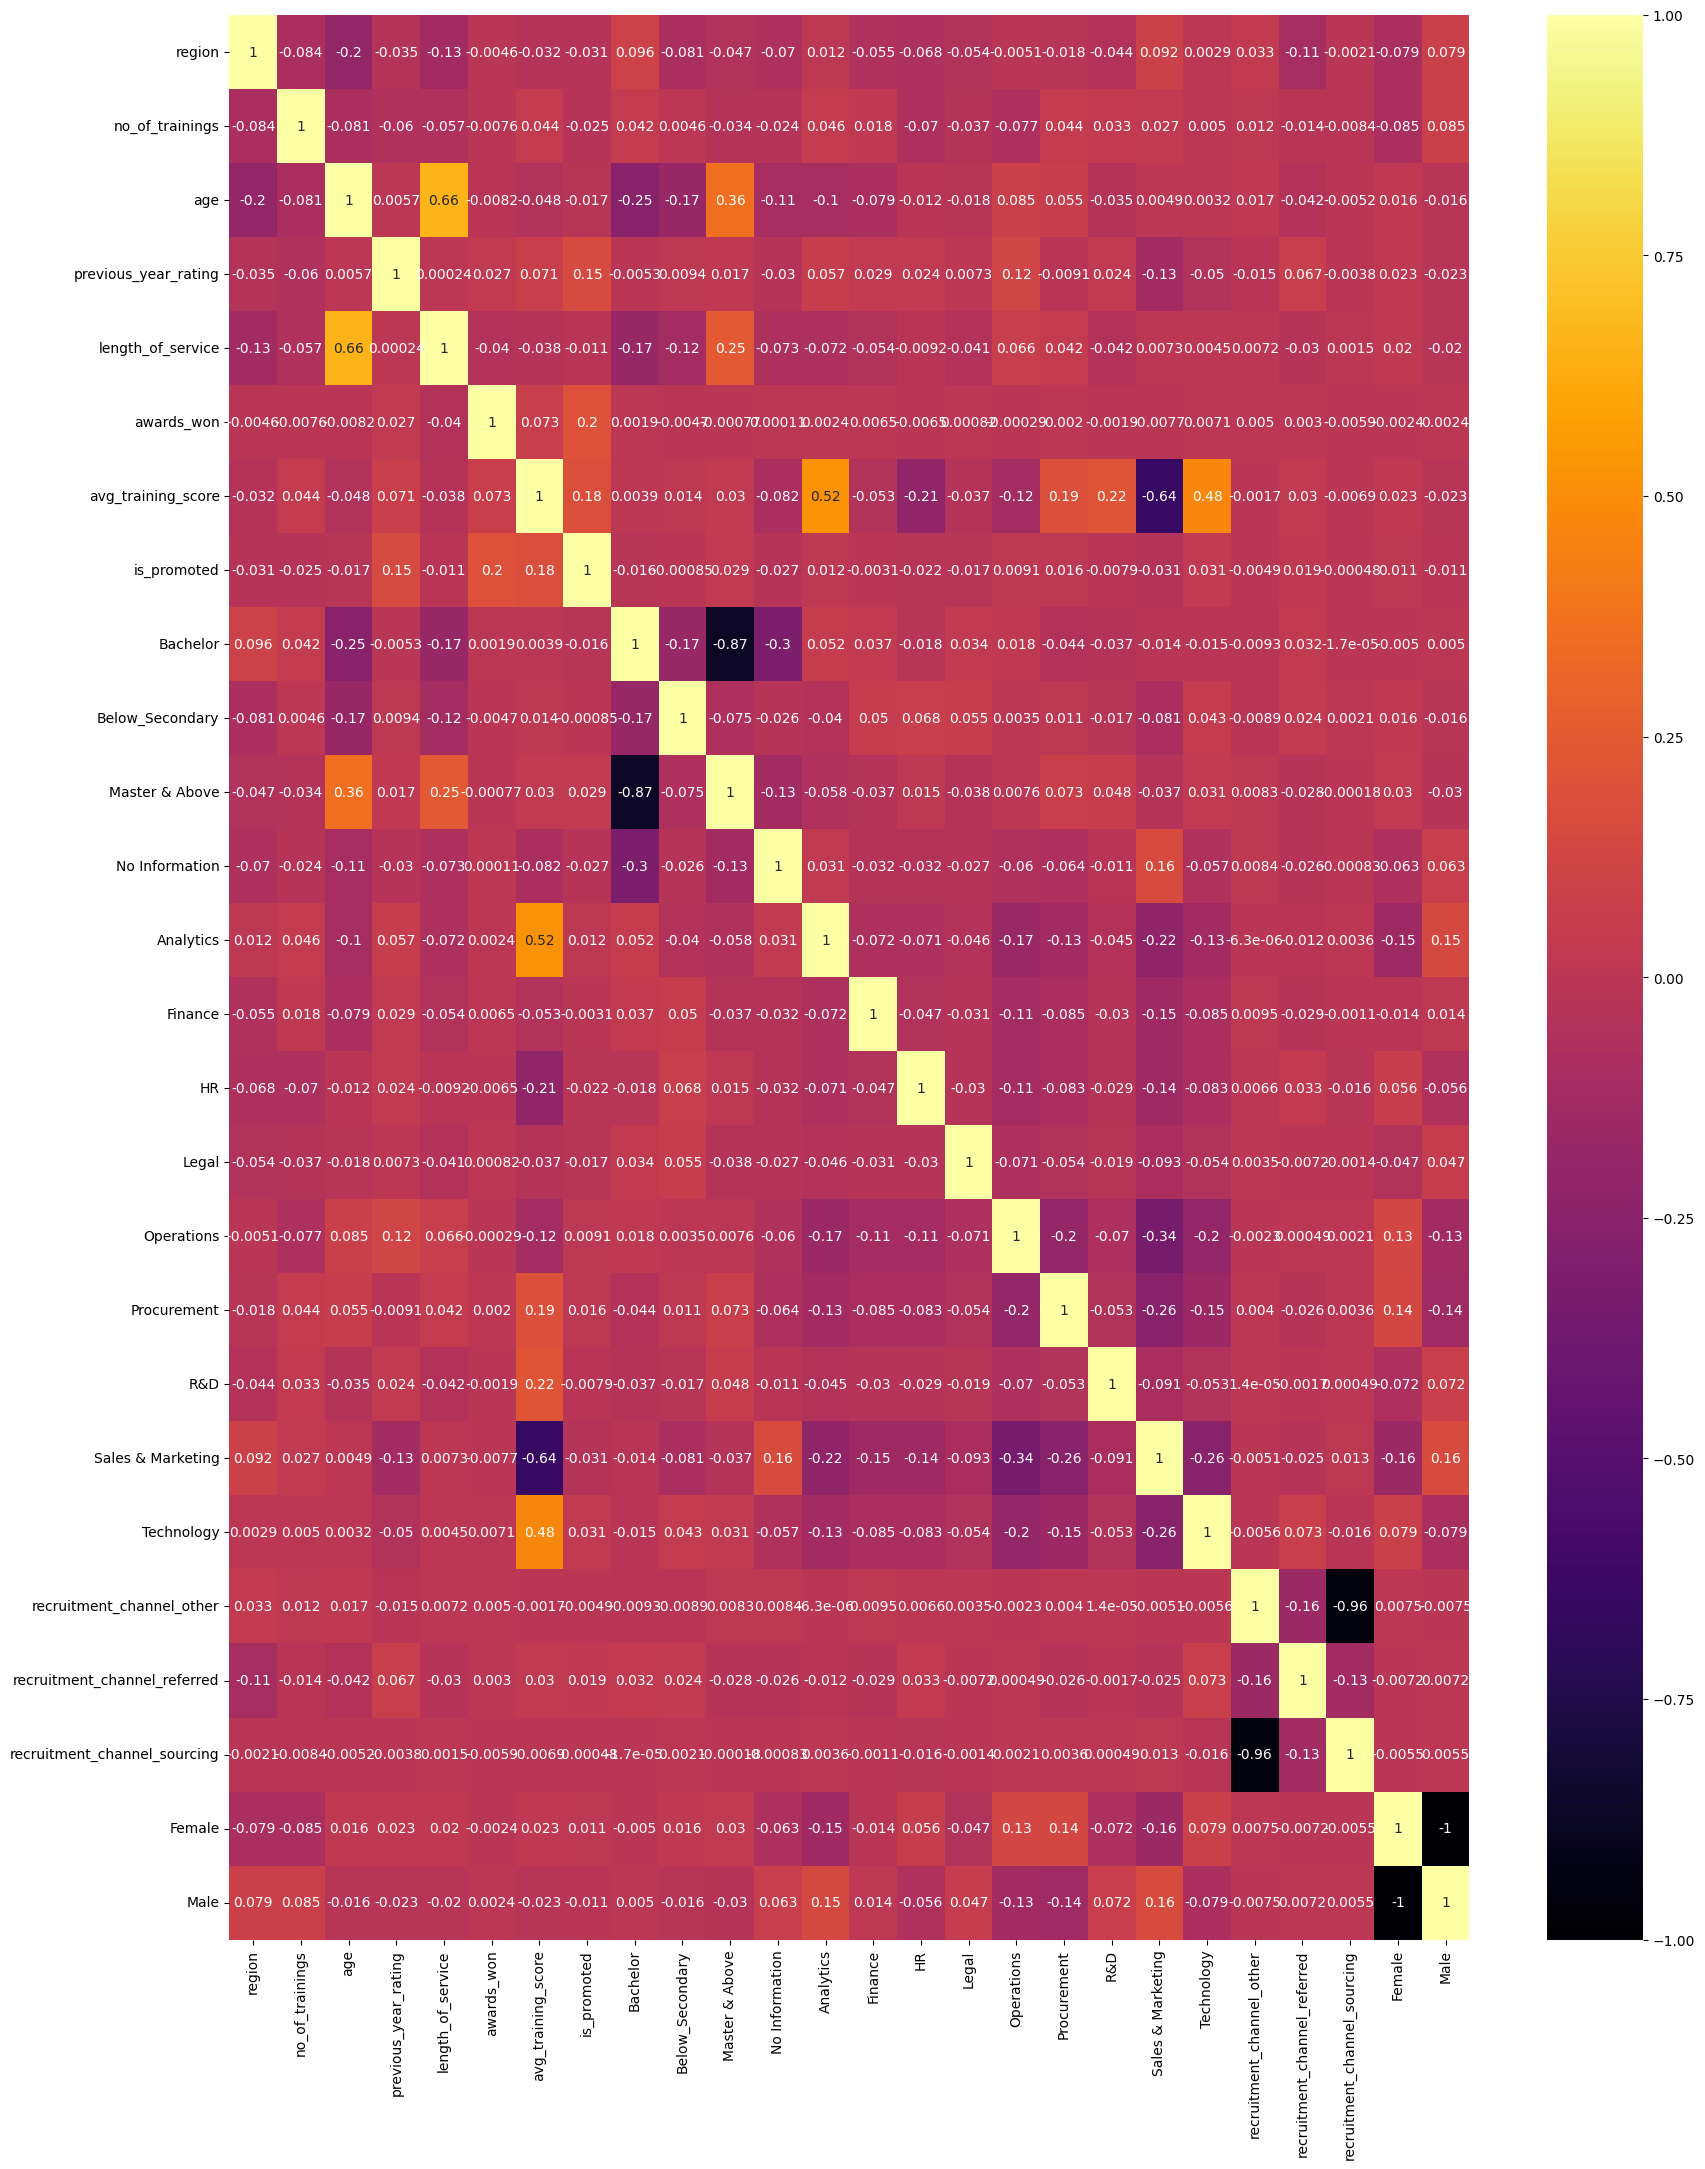

In [33]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(), annot=True, cmap="inferno")
plt.show()

**Lists the names of all columns in the DataFrame after applying the transformations and encodings.**

In [34]:
df.columns

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted',
       'Bachelor', 'Below_Secondary', 'Master & Above', 'No Information',
       'Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'Female', 'Male'],
      dtype='object')

# **Model Building**

**Defines "X" as the feature set containing the specified columns and "y" as the target variable containing the "is_promoted" column.**

In [35]:
X = df[['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score',
       'Bachelor', 'Below_Secondary', 'Master & Above', 'No Information',
       'Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'Female', 'Male']]

y = df[["is_promoted"]]

**Scales the feature set "X" and target variable "y" to a range between 0 and 1 using "MinMaxScaler", with the output format set to pandas DataFrames.**

In [36]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = "pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**Imports train_test_split for splitting data into training and testing sets, and classification_report for evaluating the performance of classification models.**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**Splits the scaled feature set X and target variable y into training and testing sets, with 80% of the data used for training.**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Initialize Model: LogisticRegression is set with C=2.0 to control regularization strength.**

**2: Train Model: The Logistic Regression model is trained on the training data (X_train, y_train).**

**3: Make Predictions: Predictions are generated for the test set (X_test).**

**4: Evaluate Performance: classification_report displays precision, recall, and F1-score for assessing model performance.**

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=2.0)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

CR = classification_report(y_test, y_pred)

print("Logistic Regression Classification Report")
print("")
print(CR)

Logistic Regression Classification Report

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      9995
         1.0       0.86      0.21      0.34       967

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.65     10962
weighted avg       0.92      0.93      0.91     10962



**1: Initialize Model: RandomForestClassifier is created with n_estimators=100 for the number of trees and n_jobs=-1 to use all available processors.**

**2: Train Model: The Random Forest Classifier is trained using X_train and y_train.**

**3: Make Predictions: The trained model predicts labels for X_test.**

**4: Evaluate Performance: classification_report shows precision, recall, and F1-score metrics for model performance.**

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, n_jobs=-1)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

CR = classification_report(y_test, y_pred)

print("Random Forest Classification Report")
print("")
print(CR)

Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      9995
         1.0       0.84      0.29      0.43       967

    accuracy                           0.93     10962
   macro avg       0.89      0.64      0.70     10962
weighted avg       0.93      0.93      0.92     10962



**1: Initialize Model: DecisionTreeClassifier is set with max_depth=100 to limit tree depth.**

**2: Train Model: The Decision Tree Classifier is trained using X_train and y_train.**

**3: Make Predictions: The trained model predicts labels for X_test.**

**4: Evaluate Performance: classification_report displays precision, recall, and F1-score metrics for the model's performance.**

In [41]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=100)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

CR = classification_report(y_test, y_pred)

print("Decision Tree Classification Report")
print("")
print(CR)

Decision Tree Classification Report

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      9995
         1.0       0.35      0.40      0.37       967

    accuracy                           0.88     10962
   macro avg       0.64      0.66      0.65     10962
weighted avg       0.89      0.88      0.88     10962



**1: Initialize Model: SVC is configured with kernel="rbf" for non-linear classification and C=10 to control the regularization strength.**

**2: Train Model: The SVC model is trained using X_train and y_train.**

**3: Make Predictions: The trained model predicts labels for X_test.**

**4: Evaluate Performance: classification_report shows metrics like precision, recall, and F1-score to assess the model's performance.**

In [42]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", C=10)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

CR = classification_report(y_test, y_pred)

print("Support Vector Classification Report")
print("")
print(CR)

Support Vector Classification Report

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      9995
         1.0       0.96      0.14      0.24       967

    accuracy                           0.92     10962
   macro avg       0.94      0.57      0.60     10962
weighted avg       0.93      0.92      0.90     10962



# **Conclusion:**

**Based on the precision scores from the classification reports of various models, the Support Vector Classifier (SVC) emerges as the best-performing model. Here's a summary of the precision scores:**

- **Logistic Regression**:
  - **Precision for class 0.0: 0.93**
  - **Precision for class 1.0: 0.86**

- **Random Forest**:
  - **Precision for class 0.0: 0.94**
  - **Precision for class 1.0: 0.84**

- **Decision Tree**:
  - **Precision for class 0.0: 0.94**
  - **Precision for class 1.0: 0.35**

- **Support Vector Classifier (SVC)**:
  - **Precision for class 0.0: 0.92**
  - **Precision for class 1.0: 0.96**

**Among the models evaluated, the Support Vector Classifier (SVC) stands out with the highest precision for class 0.0 (0.92) & class 1.0 (0.96).**

**Thus, the Support Vector Classifier (SVC) is the best model overall, offering a well-balanced and high precision across both classes.**

# **Save Model**

**Saves the trained model "svc" to a file named "Finalized-Model.pickle" using pickle.**

**This code serializes and saves the trained feature and target scalers into separate pickle files for later reuse during model inference or deployment.**

In [43]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(svc, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(Scaler_X, file)

with open("Scaler_y.pickle", "wb") as file:
    pickle.dump(Scaler_y, file)